In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def merge_reps(path, file, columns, col, skiprows=None):

    df_1 = pd.read_csv("../data/%s/run-1-%s.dat" %(path, file),
                       delimiter=' ', skiprows=skiprows, header=None)

    df_1.columns = columns
    df_1 = df_1.dropna(axis=1)

    merge_reps = df_1[['update',col]].copy()
    merge_reps.columns = ["update",col+"_1"]

    for i in range(2,51):

        df = pd.read_csv("../data/%s/run-%s-%s.dat" %(path, i, file),
                         delimiter=' ', skiprows=skiprows, header=None)

        df.columns = columns
        df = df.dropna(axis=1)

        merge_reps[col+'_%s' %i] = df[col]
        
    return merge_reps

In [3]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_ave = merge_reps(path='cyclic_zero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

In [4]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_cyc = merge_reps(path='cyclic_notzero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

In [5]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_pun = merge_reps(path='punish_value_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

In [6]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_cp = merge_reps(path='cyclic_punish_data', file='average',
                        columns=columns, col='fitness', skiprows=19)

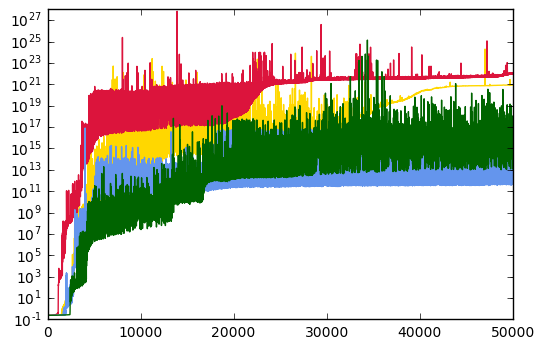

In [7]:
plt.plot(fitness_ave["update"],
         fitness_ave.iloc[:,1:].mean(axis=1),
         color='gold')

plt.plot(fitness_cyc["update"],
         fitness_cyc.iloc[:,1:].mean(axis=1),
         color='crimson')

plt.plot(fitness_pun["update"],
         fitness_pun.iloc[:,1:].mean(axis=1),
         color='cornflowerblue')

plt.plot(fitness_cp["update"],
         fitness_cp.iloc[:,1:].mean(axis=1),
         color='darkgreen')


plt.yscale('log')

In [4]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

df_1 = pd.read_csv("../avida_files/clock/data/run-1-average.dat",
                    delimiter=' ', skiprows=19, header=None)
df_1.columns = columns
df_1 = df_1.dropna(axis=1)

In [6]:
df_1.head()

,update,merit,gestation_time,fitness,repro_rate,(deprecated)_size,copied_size,executed_size,(deprecated)_abundance,proportion_of_organisms_that_gave_birth_in_this_update,proportion_of_breed_true_organisms,(deprecated)_genotype_depth,generation,neutral_metric,lineage_label,true_replication_rate_(based_on_births/update_time-averaged)
0,0,97.0000,389.000,0.000000,0,100.000,100.000,97.0000,1.00000,1.000000,1.000000,0.0000,0.0000,0.000000,0,0.000000
1,1000,98.1026,392.162,0.250982,0,106.855,104.841,98.4662,1.26229,0.041446,0.018915,24.4559,77.7563,-1.286020,0,0.155950
2,2000,97.3389,371.569,0.266214,0,104.612,103.176,97.3081,1.25479,0.046667,0.018889,43.7114,162.5080,-0.182076,0,0.162417
3,3000,107.7340,349.318,0.313036,0,103.459,102.371,96.6968,1.25716,0.067260,0.024458,65.4111,277.9790,2.676840,0,0.180892
4,4000,146.1760,363.414,0.396405,0,107.150,105.398,99.7491,1.22769,0.051239,0.013088,104.5290,423.6520,6.211390,0,0.225320


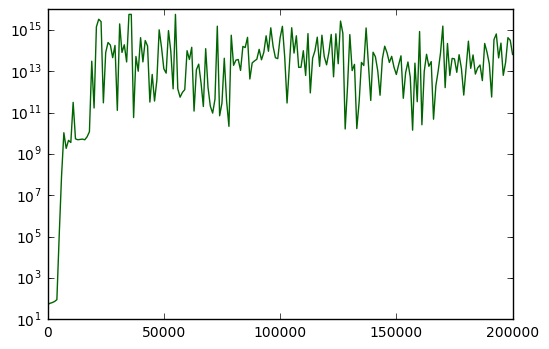

In [5]:
plt.plot(df_1["update"],
         df_1.iloc[:,1:].mean(axis=1),
         color='darkgreen')


plt.yscale('log')

In [75]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_cyc1_reac = pd.read_table("../data/cyclic_zero_data/run-1-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc1_reac.columns = columns
df_cyc1_reac = df_cyc1_reac.dropna(axis=1)

df_cyc2_reac = pd.read_table("../data/cyclic_zero_data/run-2-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc2_reac.columns = columns
df_cyc2_reac = df_cyc2_reac.dropna(axis=1)

df_cyc3_reac = pd.read_table("../data/cyclic_zero_data/run-3-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc3_reac.columns = columns
df_cyc3_reac = df_cyc3_reac.dropna(axis=1)

df_cyc4_reac = pd.read_table("../data/cyclic_zero_data/run-4-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc4_reac.columns = columns
df_cyc4_reac = df_cyc4_reac.dropna(axis=1)

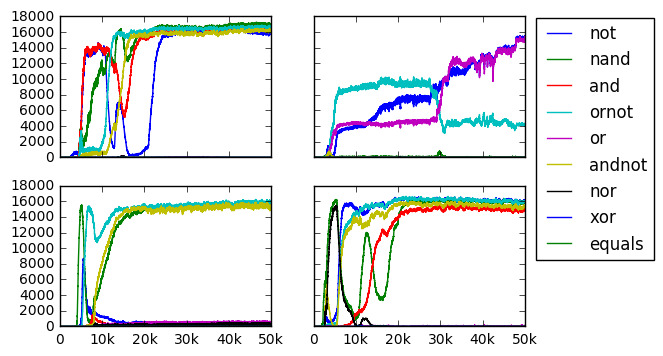

In [78]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(df_cyc1_reac['update'], df_cyc1_reac[['not','nand','and','ornot','or',
                                               'andnot','nor','xor','equals']])

ax2.plot(df_cyc2_reac['update'], df_cyc2_reac[['not','nand','and','ornot','or',
                                              'andnot','nor','xor','equals']])

ax2.legend(['not','nand','and','ornot','or','andnot','nor','xor','equals'], bbox_to_anchor=(1.65, 1.05))

ax3.plot(df_cyc3_reac['update'], df_cyc3_reac[['not','nand','and','ornot','or',
                                           'andnot','nor','xor','equals']])

ax3.set_xticklabels(['0','10k','20k','30k','40k','50k'])

ax4.plot(df_cyc4_reac['update'], df_cyc4_reac[['not','nand','and','ornot','or',
                                             'andnot','nor','xor','equals']])

ax4.set_xticklabels(['0','10k','20k','30k','40k','50k']);

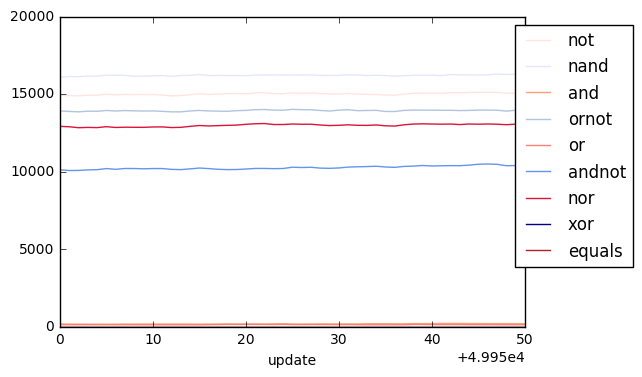

In [89]:
df_cyc1_reac.plot('update', ['not','nand','and','ornot','or',
                             'andnot','nor','xor','equals'],
                  color=['mistyrose','lavender','lightsalmon','lightsteelblue','salmon',
                         'cornflowerblue','crimson','navy','firebrick'])

plt.xlim(49950,50000)
plt.ylim(0,20000)
plt.legend(bbox_to_anchor=(1.25, 1.0));

In [86]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_cyc1_reac = pd.read_table("../data/punish_value_data/run-1-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc1_reac.columns = columns
df_cyc1_reac = df_cyc1_reac.dropna(axis=1)

df_cyc2_reac = pd.read_table("../data/punish_value_data/run-2-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc2_reac.columns = columns
df_cyc2_reac = df_cyc2_reac.dropna(axis=1)

df_cyc3_reac = pd.read_table("../data/punish_value_data/run-3-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc3_reac.columns = columns
df_cyc3_reac = df_cyc3_reac.dropna(axis=1)

df_cyc4_reac = pd.read_table("../data/punish_value_data/run-4-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc4_reac.columns = columns
df_cyc4_reac = df_cyc4_reac.dropna(axis=1)

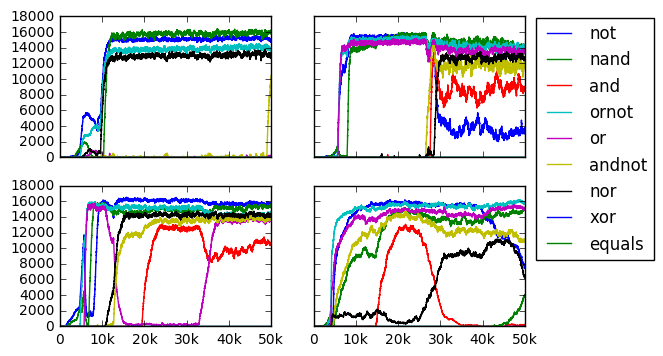

In [87]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(df_cyc1_reac['update'], df_cyc1_reac[['not','nand','and','ornot','or',
                                               'andnot','nor','xor','equals']])

ax2.plot(df_cyc2_reac['update'], df_cyc2_reac[['not','nand','and','ornot','or',
                                              'andnot','nor','xor','equals']])

ax2.legend(['not','nand','and','ornot','or','andnot','nor','xor','equals'], bbox_to_anchor=(1.65, 1.05))

ax3.plot(df_cyc3_reac['update'], df_cyc3_reac[['not','nand','and','ornot','or',
                                           'andnot','nor','xor','equals']])

ax3.set_xticklabels(['0','10k','20k','30k','40k','50k'])

ax4.plot(df_cyc4_reac['update'], df_cyc4_reac[['not','nand','and','ornot','or',
                                             'andnot','nor','xor','equals']])

ax4.set_xticklabels(['0','10k','20k','30k','40k','50k']);

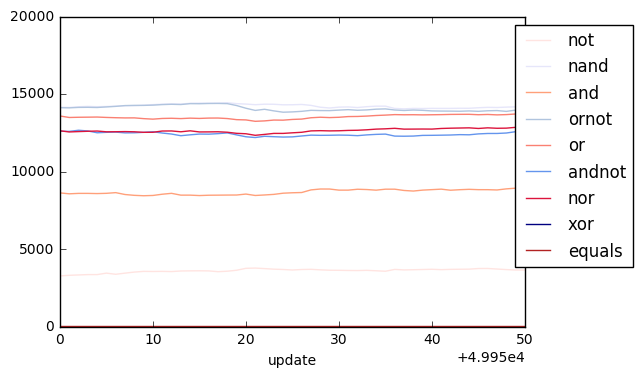

In [88]:
df_cyc2_reac.plot('update', ['not','nand','and','ornot','or',
                             'andnot','nor','xor','equals'],
                  color=['mistyrose','lavender','lightsalmon','lightsteelblue','salmon',
                         'cornflowerblue','crimson','navy','firebrick'])

plt.xlim(49950,50000)
plt.ylim(0,20000)
plt.legend(bbox_to_anchor=(1.25, 1.0));

In [8]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_cyc1_reac = pd.read_table("../data/cyclic_punish_data/run-1-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc1_reac.columns = columns
df_cyc1_reac = df_cyc1_reac.dropna(axis=1)

df_cyc2_reac = pd.read_table("../data/cyclic_punish_data/run-2-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc2_reac.columns = columns
df_cyc2_reac = df_cyc2_reac.dropna(axis=1)

df_cyc3_reac = pd.read_table("../data/cyclic_punish_data/run-3-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc3_reac.columns = columns
df_cyc3_reac = df_cyc3_reac.dropna(axis=1)

df_cyc4_reac = pd.read_table("../data/cyclic_punish_data/run-4-reactions_exe.dat",
                             delimiter=' ', skiprows=16, header=None)

df_cyc4_reac.columns = columns
df_cyc4_reac = df_cyc4_reac.dropna(axis=1)

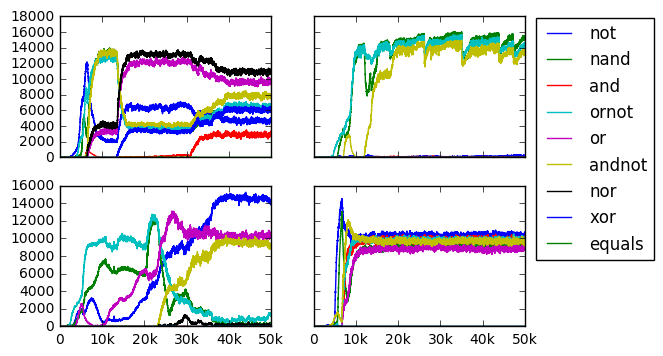

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(df_cyc1_reac['update'], df_cyc1_reac[['not','nand','and','ornot','or',
                                               'andnot','nor','xor','equals']])

ax2.plot(df_cyc2_reac['update'], df_cyc2_reac[['not','nand','and','ornot','or',
                                              'andnot','nor','xor','equals']])

ax2.legend(['not','nand','and','ornot','or','andnot','nor','xor','equals'], bbox_to_anchor=(1.65, 1.05))

ax3.plot(df_cyc3_reac['update'], df_cyc3_reac[['not','nand','and','ornot','or',
                                           'andnot','nor','xor','equals']])

ax3.set_xticklabels(['0','10k','20k','30k','40k','50k'])

ax4.plot(df_cyc4_reac['update'], df_cyc4_reac[['not','nand','and','ornot','or',
                                             'andnot','nor','xor','equals']])

ax4.set_xticklabels(['0','10k','20k','30k','40k','50k']);

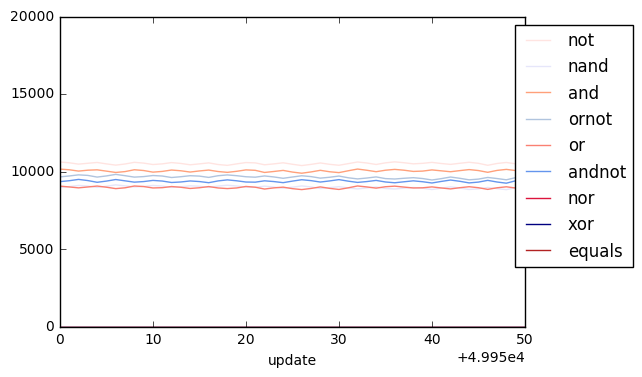

In [10]:
df_cyc4_reac.plot('update', ['not','nand','and','ornot','or',
                             'andnot','nor','xor','equals'],
                  color=['mistyrose','lavender','lightsalmon','lightsteelblue','salmon',
                         'cornflowerblue','crimson','navy','firebrick'])

plt.xlim(49950,50000)
plt.ylim(0,20000)
plt.legend(bbox_to_anchor=(1.25, 1.0));